<div style="text-align:center">
    <h1>
        *** Project: Winter 2025 ***
    </h1>
</div>

---

<h2>I. Team members</h2>
<b>
    
- Minh Le Nguyen
- Liam Knapp
- Gautam Singh
- Gleb Ignatov

</b>
<br>

---

## II. Implementation

In [10]:
!pip install seaborn

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

### 1. Load Large Dataset

In [12]:
large_dataset_dataframe = pd.read_csv("./Bigdataset/BreakData/part_1.csv", encoding='utf-8')

In [13]:
print(large_dataset_dataframe.info)

<bound method DataFrame.info of                    ts    userId  sessionId      page        auth method  \
0       1538352117000      30.0         29  NextSong   Logged In    PUT   
1       1538352180000       9.0          8  NextSong   Logged In    PUT   
2       1538352394000      30.0         29  NextSong   Logged In    PUT   
3       1538352416000       9.0          8  NextSong   Logged In    PUT   
4       1538352676000      30.0         29  NextSong   Logged In    PUT   
...               ...       ...        ...       ...         ...    ...   
286495  1543622240000       NaN        500      Home  Logged Out    GET   
286496  1543622241000       NaN        500     Login  Logged Out    PUT   
286497  1543622248000  300011.0        500      Home   Logged In    GET   
286498  1543622398000  300011.0        500     About   Logged In    GET   
286499  1543622411000  300011.0        500  NextSong   Logged In    PUT   

        status level  itemInSession                               l

### 2. Data Preprocessing

#### a. Large Dataset Size

In [14]:
print("Number of rows inside the dataset: ", large_dataset_dataframe.shape[0])
print("Number of columns inside the dataset: ", large_dataset_dataframe.shape[1])

Number of rows inside the dataset:  286500
Number of columns inside the dataset:  18


#### b. The Columns Names and Dtypes inside Large Dataframe

In [15]:
print("The columns inside the large dataframe\n")
columns_list = large_dataset_dataframe.columns.to_list()
dtypes_list = large_dataset_dataframe.dtypes.to_list()
print(f"{'Column Name':<25} | {'Data Type'}")
print("-" * 40)
for col, dtype in zip(columns_list, dtypes_list):
    print(f"{col:<25} | {dtype}")

The columns inside the large dataframe

Column Name               | Data Type
----------------------------------------
ts                        | int64
userId                    | float64
sessionId                 | int64
page                      | object
auth                      | object
method                    | object
status                    | int64
level                     | object
itemInSession             | int64
location                  | object
userAgent                 | object
lastName                  | object
firstName                 | object
registration              | float64
gender                    | object
artist                    | object
song                      | object
length                    | float64


#### c. Summarize Data Explore inside Large Dataframe

In [16]:
class summarize_explore():
    def __init__(self, processing_file_path):
        self.raw_df = pd.read_csv("./Bigdataset/BreakData/part_1.csv", encoding='utf-8')

    def print_dataframe_metadata(self):
        """
        Prints metadata information about a Pandas DataFrame.
        
        Parameters:
        raw_df (pd.DataFrame): The DataFrame for which metadata is to be printed.
        """
        print("DataFrame Metadata\n")

        print("\nSummary Statistics:\n")
        print(self.raw_df.describe(include='all'))
        print("\n================================================================\n")
        
        print("\nShape:\n", self.raw_df.shape)
        print("\n================================================================\n")
        
        print("\nMissing Values:\n")
        print(self.raw_df.isnull().sum())
        print("\n================================================================\n")
        
        print("\nList of Columns:\n")
        print(self.raw_df.columns.to_list())
        print("\n================================================================\n")

        print("\nColumns and Data Types:\n")
        print(self.raw_df.dtypes)
        print("\n================================================================\n")
                
        print("\nUnique Values per Column:\n")
        print(self.raw_df.nunique())
        print("\n================================================================\n")

        print("\nUnique Values per Column:\n")
        for col in self.raw_df.columns:
            print(self.raw_df[col].unique())
            print("\n================================================================\n")
        
        print("\nFirst 5 Rows:\n")
        print(self.raw_df.head())
        print("\n================================================================\n")


    def checking_missing_value(self, input_col_obj, mode="single"):
        if mode == "single" and isinstance(input_col_obj, str):
            df_missing_values_dict = dict()
            df_missing_values_dict[input_col_obj] = self.raw_df[input_col_obj].isnull().sum()
            missing_values_df = pd.DataFrame(
                list(df_missing_values_dict.items()),
                columns=["Column Name", "Number of missing values"]
            )
            return missing_values_df
        elif mode == "multiple" and isinstance(input_col_obj, list):
            df_missing_values_dict = dict()
            for col in input_col_obj:
                df_missing_values_dict[col] = self.raw_df[col].isnull().sum()
            
            missing_values_df = pd.DataFrame(
                list(df_missing_values_dict.items()),
                columns=["Column Name", "Number of missing values"]
            )
            return missing_values_df
        else:
            return "Please check the function again"

    def distribution_shape_analytics(self, df_input, column_input):
        df_process_dis = df_input.dropna().copy()
        # Distribution Shape
        skewness_temp = skew(df_process_dis[column_input])
        kurtosis_temp = kurtosis(df_process_dis[column_input])
        print("Distribution Shape Analytics for AverageTemperature:")
        print(f"Distribution Shape - Skewness: {round(skewness_temp,2)}, Kurtosis: {round(kurtosis_temp,2)}")
        if skewness_temp > 0:
            print("The distribution is positively skewed, indicating a longer tail on the right.")
        elif skewness_temp < 0:
            print("The distribution is negatively skewed, indicating a longer tail on the left.")
        else:
            print("The distribution is symmetric.")
        
        if kurtosis_temp > 0:
            print("The distribution has heavier tails and a sharper peak than a normal distribution (leptokurtic).")
        elif kurtosis_temp < 0:
            print("The distribution has lighter tails and a flatter peak than a normal distribution (platykurtic).")
        else:
            print("The distribution has a kurtosis similar to a normal distribution (mesokurtic).")
        print("\n")
        return skewness_temp, kurtosis_temp
    
    def fill_missing_values(self, column_name, fill_value):
        self.raw_df[column_name] = self.raw_df[column_name].fillna(fill_value)
        return self.raw_df
        
    def plot_histogram(self, df_input, column_name, default_bin=10):
        df_processed = df_input.dropna().copy()
        column_data = df_processed[column_name].dropna()
        iqr = np.percentile(column_data, 75) - np.percentile(column_data, 25)
        bin_width_fd = 2 * iqr / (len(column_data) ** (1 / 3))
        if bin_width_fd > 0:
            n_bins_fd = int(np.ceil((column_data.max() - column_data.min()) / bin_width_fd))
        else:
            n_bins_fd = default_bin

        plt.figure(figsize=(6, 4))
        sns.histplot(column_data, bins=n_bins_fd, kde=True, color="blue", alpha=0.6)
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    def detect_outlier(self, column_input):
        df_outliers_detect = self.raw_df.dropna().copy()
        df_outliers_detect['Z_Score'] = zscore(df_outliers_detect[column_input])
        z_outliers = df_outliers_detect[abs(df_outliers_detect['Z_Score']) > 3]
        num_z_outliers = len(z_outliers)
        Q1 = df_outliers_detect[column_input].quantile(0.25)
        Q3 = df_outliers_detect[column_input].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        iqr_outliers = df_outliers_detect[(df_outliers_detect[column_input] < lower_bound) | 
                                        (df_outliers_detect[column_input] > upper_bound)]
        num_iqr_outliers = len(iqr_outliers)
        df_outliers_detect['IQR_Outlier'] = (df_outliers_detect[column_input] < lower_bound) | (df_outliers_detect[column_input] > upper_bound)
        print(f"Number of outliers detected by Z-score method: {num_z_outliers}")
        print(f"Number of outliers detected by IQR method: {num_iqr_outliers}")
        return num_z_outliers, num_iqr_outliers
    
    def scale_numerical_variables(self, df_input, column_name, method="Min-Max"):
        df_processed = df_input.dropna().copy()
        if method == "Min-Max":
            scaler = MinMaxScaler()
            df_processed[column_name] = scaler.fit_transform(df_processed[[column_name]])
            return df_processed
        elif method == "Standardization":
            scaler = StandardScaler()
            df_processed[column_name] = scaler.fit_transform(df_processed[[column_name]])
            return df_processed
        elif method == "Robust":
            # RobustScaler uses median and IQR (interquartile range) to scale and making it robust to outliers
            scaler = RobustScaler()
            df_processed[column_name] = scaler.fit_transform(df_processed[[column_name]])
            return df_processed
        elif method == "Log":
            # log(1 + x) to avoid log(0) use logarithmic transformation for normalizing skewed data
            df_processed[column_name] = np.log1p(df_processed[column_name])
            return df_processed
        else:
            raise ValueError("Invalid scaling method. Choose from ['Min-Max', 'Standardization', 'Robust', 'Log']")

    def convert_categorical_variables(self, df_input):
        df_processed = df_input['userId'].dropna().copy()
        df_input['churn'] = df_input['page'].apply(lambda x: 1 if x == "Cancellation Confirmation" else 0)
        return df_input

#### d. Print Meta Data

In [17]:
summarize_explore_ = summarize_explore("./Bigdataset/BreakData/part_1.csv") 
df_large_dataset_raw = summarize_explore_.raw_df
column_name = df_large_dataset_raw.columns.to_list()
summarize_explore_.print_dataframe_metadata()

DataFrame Metadata


Summary Statistics:

                  ts         userId      sessionId      page       auth  \
count   2.865000e+05  278154.000000  286500.000000    286500     286500   
unique           NaN            NaN            NaN        22          4   
top              NaN            NaN            NaN  NextSong  Logged In   
freq             NaN            NaN            NaN    228108     278102   
mean    1.540957e+12   59682.022786    1041.526555       NaN        NaN   
std     1.507544e+09  109091.949999     726.776263       NaN        NaN   
min     1.538352e+12       2.000000       1.000000       NaN        NaN   
25%     1.539697e+12      51.000000     336.000000       NaN        NaN   
50%     1.540932e+12      98.000000    1013.000000       NaN        NaN   
75%     1.542266e+12  100004.000000    1675.000000       NaN        NaN   
max     1.543799e+12  300025.000000    2474.000000       NaN        NaN   

        method         status   level  itemInSession  \
c

#### e. Check Missing Values inside Columns inside Large Dataset

In [18]:
summarize_explore_.checking_missing_value(column_name, mode="multiple")

,Column Name,Number of missing values
0,ts,0
1,userId,8346
2,sessionId,0
3,page,0
4,auth,0
5,method,0
6,status,0
7,level,0
8,itemInSession,0
9,location,8346


#### f. Define the Churn

In [19]:
df_large_dataset_churn_processed = summarize_explore_.convert_categorical_variables(df_large_dataset_raw)

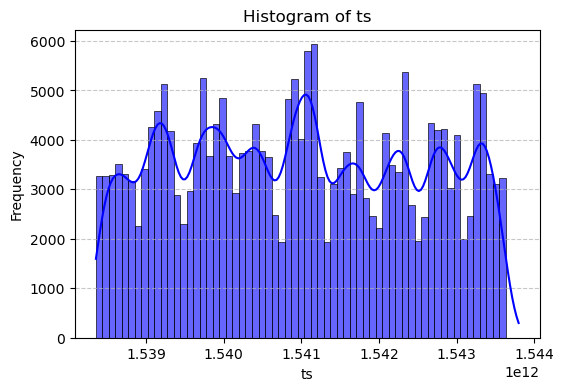

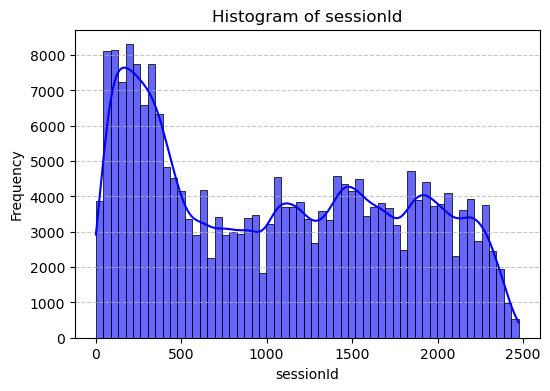

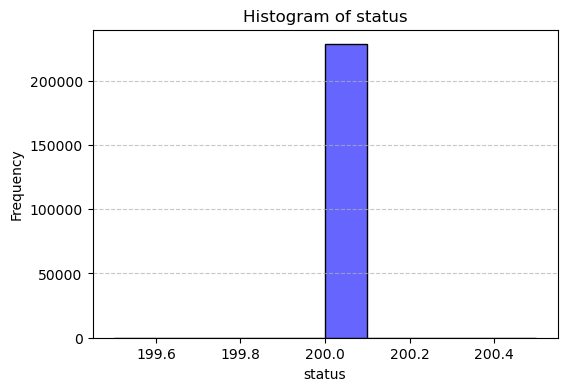

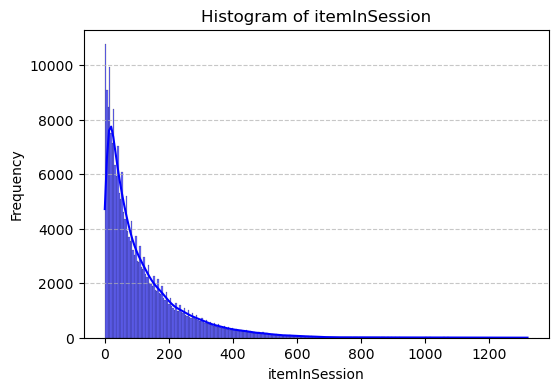

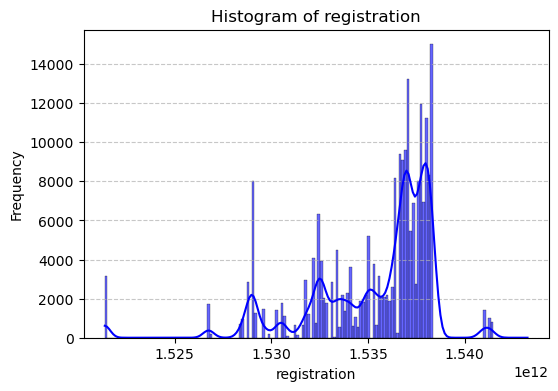

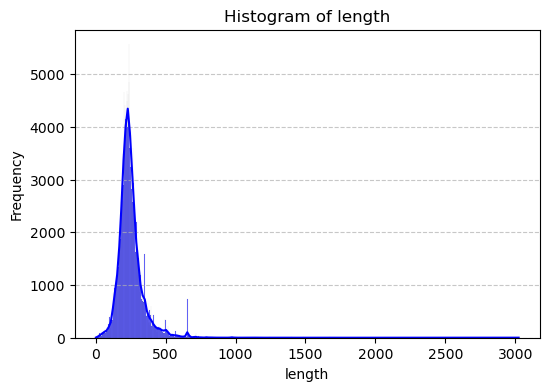

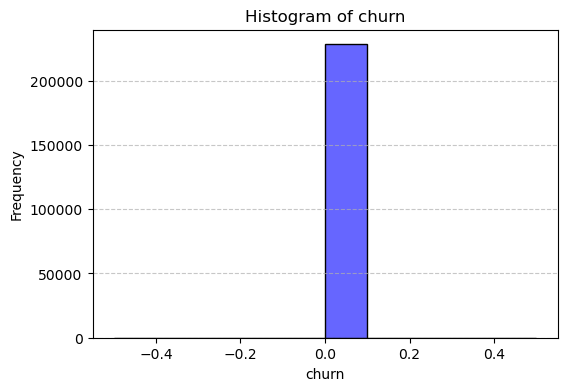

In [20]:
visualize_large_df_explore = df_large_dataset_churn_processed.copy()
list_columns = visualize_large_df_explore.drop("userId", axis=1).select_dtypes(include=['int64', 'float64']).columns
for col in list_columns:
    summarize_explore_.plot_histogram(visualize_large_df_explore, col)

#### g, Checking Non Missing UserId and Churn Portion

In [21]:
print("\nProportion (percentage) of each churn value:")
df_large_dataset_non_missing = df_large_dataset_churn_processed.filter(df_large_dataset_churn_processed["userId"] != "")
print(len(df_large_dataset_non_missing))
print("---------------------------------------------------------------------")
print(df_large_dataset_churn_processed['churn'].value_counts(normalize=True))
print("---------------------------------------------------------------------")
print("Count of each churn value:")
print(df_large_dataset_churn_processed['churn'].value_counts())


Proportion (percentage) of each churn value:
286500
---------------------------------------------------------------------
churn
0    0.999818
1    0.000182
Name: proportion, dtype: float64
---------------------------------------------------------------------
Count of each churn value:
churn
0    286448
1        52
Name: count, dtype: int64


#### h, Remove duplicates based on 'userId'

In [22]:
df_large_dataset_churn_processed_non_missing = df_large_dataset_churn_processed[df_large_dataset_churn_processed["userId"].notna() & (df_large_dataset_churn_processed["userId"] != "")]
df_large_dataset_churn_processed_non_missing_non_duplicated = df_large_dataset_churn_processed_non_missing.drop_duplicates()
print("Number of records after processed removed missing and duplicated", df_large_dataset_churn_processed_non_missing_non_duplicated.shape[0])

Number of records after processed removed missing and duplicated 278154


### 3. Data Exploratory Analysis

#### A, Calculate average churn rate by gender

The avg churn rate of females is: 0.012938451784859424
The avg churn rate of males is: 0.025894995792063183


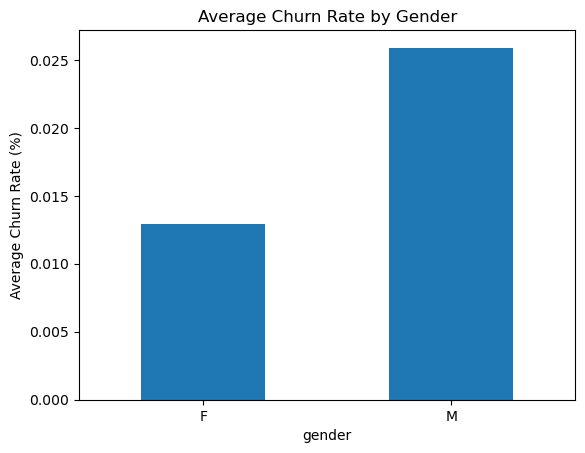

In [23]:
gender_stat_large_df = df_large_dataset_churn_processed_non_missing_non_duplicated[['gender', 'churn']]
avg_churn_by_gender = gender_stat_large_df.groupby('gender')['churn'].mean() * 100

print('The avg churn rate of females is:', avg_churn_by_gender.get('F', 'N/A'))
print('The avg churn rate of males is:', avg_churn_by_gender.get('M', 'N/A'))

avg_churn_by_gender.plot(kind='bar')
plt.ylabel('Average Churn Rate (%)')
plt.title('Average Churn Rate by Gender')
plt.xticks(rotation=0)
plt.show()

#### B, Calculate average churn rate by artist

In [24]:
artist_stat_large_df = df_large_dataset_churn_processed_non_missing_non_duplicated[['artist', 'churn']].copy()
top_artists_by_churn = (
    artist_stat_large_df.groupby('artist', dropna=False)['churn']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
top_artists_by_churn

artist
NaN              52
Pauline Croze     0
Pe'z              0
Pavement          0
Pavel Dobes       0
Name: churn, dtype: int64

#### C, Calculate average churn rate by level

Proportion of users that churned from free subscription: 0.03768776583334829
Proportion of users that churned from paid subscription: 0.013936780963256352


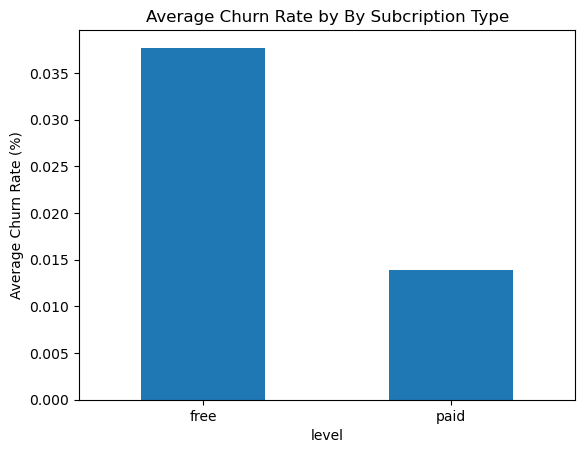

In [25]:
level_stat_large_df = df_large_dataset_churn_processed_non_missing_non_duplicated[['level', 'churn']].copy()
level_stat_large_df['churn'] = pd.to_numeric(level_stat_large_df['churn'], errors='coerce')
churn_by_level = level_stat_large_df.groupby('level')['churn'].mean() * 100

print('Proportion of users that churned from free subscription:', churn_by_level.get('free', 'N/A'))
print('Proportion of users that churned from paid subscription:', churn_by_level.get('paid', 'N/A'))

churn_by_level.plot(kind='bar')
plt.ylabel('Average Churn Rate (%)')
plt.title('Average Churn Rate by By Subcription Type')
plt.xticks(rotation=0)
plt.show()

#### D, Number of churns per State

Viewing top 10 states with churn:

         state  churn
0           CA      6
1     NY-NJ-PA      5
2           TX      3
3           FL      3
4           MI      3
5           AL      2
6           KY      2
7  PA-NJ-DE-MD      2
8           OH      2
9           MS      2


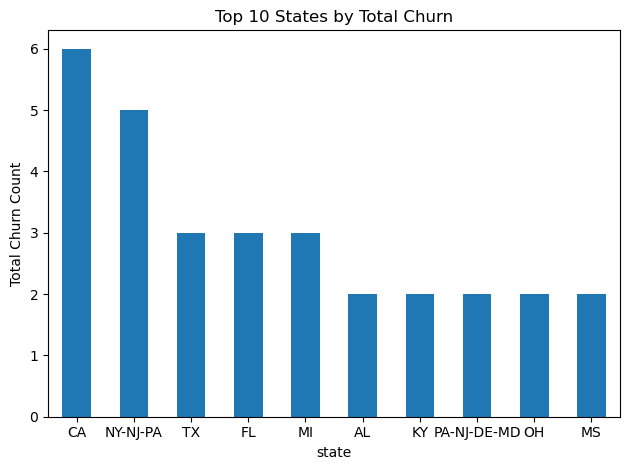

In [26]:
location_stat_large_df = df_large_dataset_churn_processed_non_missing_non_duplicated[['location', 'churn']].copy()
location_stat_large_df['churn'] = pd.to_numeric(location_stat_large_df['churn'], errors='coerce')
location_stat_large_df['state'] = location_stat_large_df['location'].str.split(',').str[1].str.strip()
state_stat_large_df = location_stat_large_df.copy()
state_stat_large_df.drop(columns='location', inplace=True)
state_churn = state_stat_large_df.groupby('state')['churn'].sum().reset_index()
state_churn = state_churn[state_churn['churn'] > 0]
top_states = state_churn.sort_values(by='churn', ascending=False).reset_index().drop(columns='index').head(10)

print('Viewing top 10 states with churn:\n')
print(top_states)

top_states.plot(kind='bar', x='state', y='churn', legend=False)
plt.ylabel('Total Churn Count')
plt.title('Top 10 States by Total Churn')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

#### E, Time-Series Analysis

##### Convert 'ts' from milliseconds to datetime

In [27]:
large_df_processed_time = df_large_dataset_churn_processed_non_missing_non_duplicated.copy()
large_df_processed_time['ts'] = pd.to_datetime(large_df_processed_time['ts'], unit='ms')

large_df_processed_time['hour'] = large_df_processed_time['ts'].dt.hour
large_df_processed_time['day'] = large_df_processed_time['ts'].dt.day
large_df_processed_time['month'] = large_df_processed_time['ts'].dt.month
large_df_processed_time['week_day'] = large_df_processed_time['ts'].dt.weekday  

In [28]:
def get_churn_distribution_by_column(column_name, churn_label, normalize=False):
    filtered_df = large_df_processed_time[large_df_processed_time['churn'] == churn_label]
    churn_distribution = filtered_df.groupby(column_name)['userId'].count()
    try:
        churn_distribution.index = churn_distribution.index.astype(int)
    except:
        pass
    if normalize:
        churn_distribution = churn_distribution / churn_distribution.sum() * 100
    return churn_distribution.sort_index()

In [29]:
def plot_churn_distribution_by_time(time_column, normalize=True, figsize=(16, 4), chart_title=None, label_rotation=0):
    churn_time_df = pd.DataFrame({
        'Churned Users': get_churn_distribution_by_column(time_column, churn_label=1, normalize=normalize),
        'Active Users': get_churn_distribution_by_column(time_column, churn_label=0, normalize=normalize)
    })
    ax = churn_time_df.plot(kind='bar', figsize=figsize)
    if chart_title is None:
        chart_title = time_column
    ax.set_ylabel('Percentage of Users' if normalize else 'User Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=label_rotation)
    ax.set_title(f'{"Percentage" if normalize else "Count"} of Users by {chart_title}')
    return ax

##### i, Percentage of Users Churn by Hour of the Day

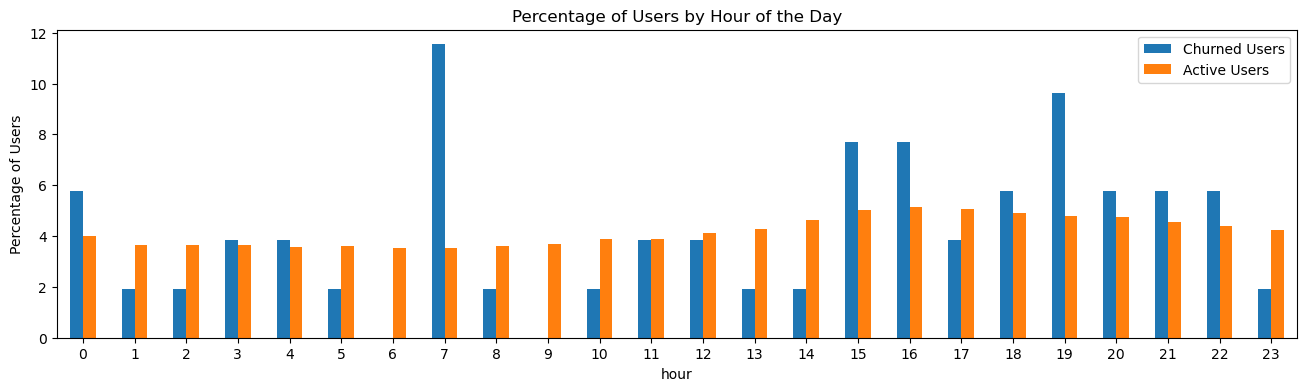

In [30]:
plot_churn_distribution_by_time('hour', chart_title='Hour of the Day')
plt.show()

##### ii, Percentage of Users Churn by Day in a Month

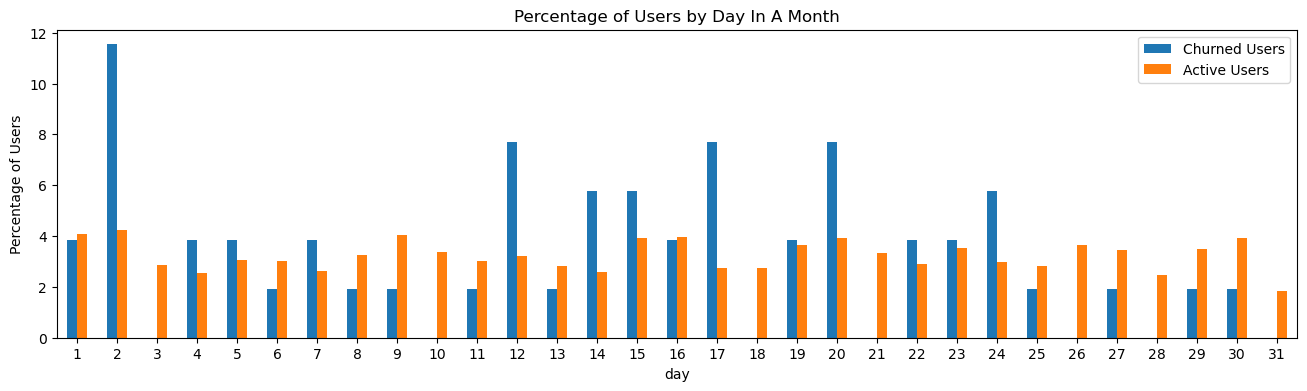

In [31]:
plot_churn_distribution_by_time('day', chart_title='Day In A Month')
plt.show()

##### iii, Percentage of Users Churn by Weekday

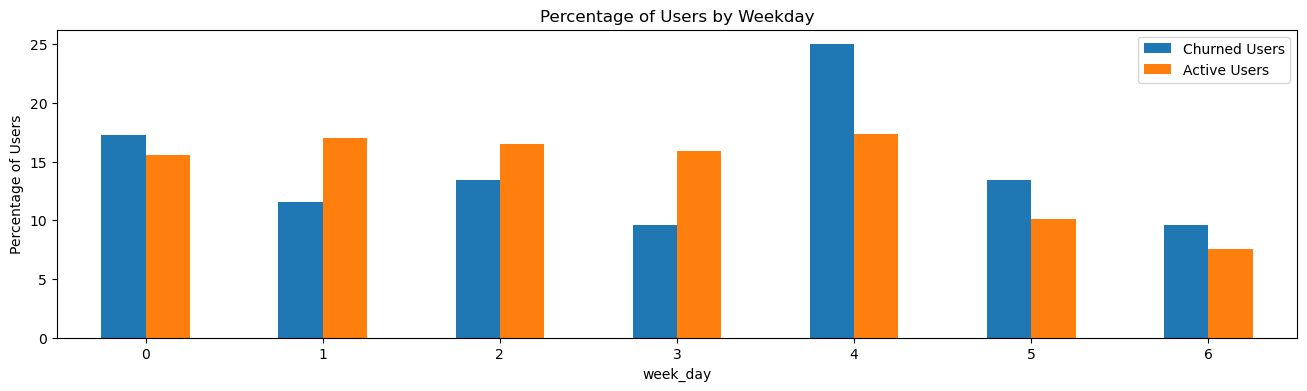

In [32]:
plot_churn_distribution_by_time('week_day', chart_title='Weekday')
plt.show()

##### iv, Percentage of Users Churn by Month

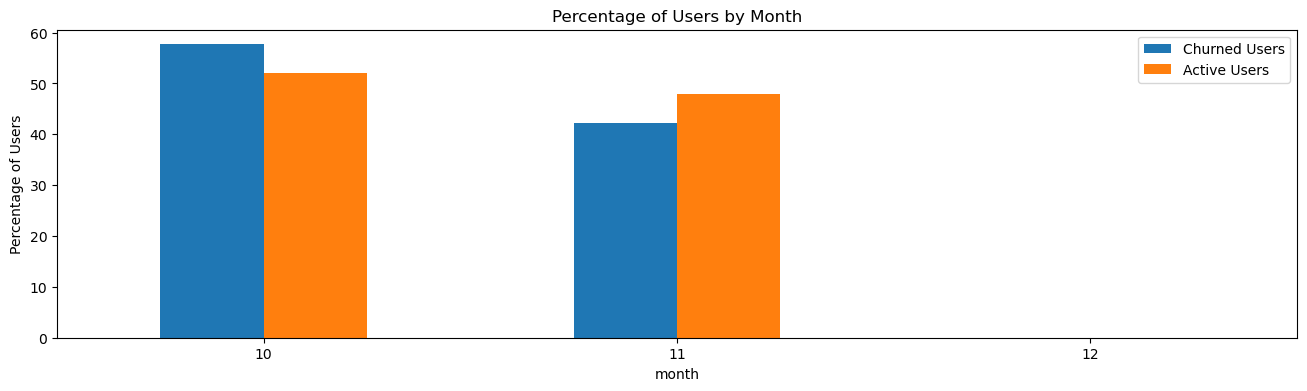

In [33]:
plot_churn_distribution_by_time('month', chart_title='Month')
plt.show()

### 4. Feature Engineering

In [34]:
feature_engineering_large_df = large_df_processed_time.copy()
feature_engineering_large_df['churn'] = pd.to_numeric(feature_engineering_large_df['churn'], errors='coerce')
feature_engineering_large_df['state'] = feature_engineering_large_df['location'].str.split(',').str[1].str.strip()

##### i. Label encode ordinal columns

In [35]:
ordinal_cols = ['level']
le = LabelEncoder()
for col in ordinal_cols:
    feature_engineering_large_df[col] = le.fit_transform(feature_engineering_large_df[col].astype(str))

##### ii. One-hot encode nominal categorical columns

In [36]:
nominal_cols = [
    'page', 'auth', 'method', 'location', 'gender', 'state'
]

nominal_backup = feature_engineering_large_df[nominal_cols].copy()
feature_engineering_large_df[nominal_cols] = feature_engineering_large_df[nominal_cols].astype(str)
feature_engineering_large_df = pd.get_dummies(feature_engineering_large_df, columns=nominal_cols, drop_first=False)
feature_engineering_large_df = pd.concat([feature_engineering_large_df, nominal_backup], axis=1)

##### iii. Calculate the length of object columns

In [37]:
object_columns_large_df = ['userAgent', 'lastName', 'firstName', 'artist', 'song']

for col in object_columns_large_df:
    feature_engineering_large_df[f"value_length_{col}"] = feature_engineering_large_df[col].astype(str).apply(len)

#### A, Feature LifeTime Since Registration

In [38]:
feature_engineering_large_df['registration'] = pd.to_datetime(feature_engineering_large_df['registration'], unit='ms')
feature_engineering_large_df['lifetime'] = (feature_engineering_large_df['ts'] - feature_engineering_large_df['registration']).dt.total_seconds()

feature_1 = feature_engineering_large_df.groupby('userId')['lifetime'].max().reset_index()
feature_1['lifetime'] = feature_1['lifetime'] / (3600 * 24)

print(feature_1.describe())

              userId    lifetime
count     225.000000  225.000000
mean    65391.013333   79.845683
std    105396.477919   37.661470
min         2.000000    0.313727
25%        60.000000   59.125856
50%       116.000000   73.004525
75%    100017.000000  100.378391
max    300025.000000  256.377674


#### B, Feature Total Songs Listened

In [39]:
feature_2 = feature_engineering_large_df.groupby('userId')['song'].count().reset_index()
feature_2 = feature_2.rename(columns={'song': 'total_songs'})

print(feature_2.describe())

              userId  total_songs
count     225.000000   225.000000
mean    65391.013333  1013.813333
std    105396.477919  1104.960779
min         2.000000     3.000000
25%        60.000000   230.000000
50%       116.000000   675.000000
75%    100017.000000  1571.000000
max    300025.000000  8002.000000


#### C, Feature Total Songs Liked

In [40]:
feature_3 = feature_engineering_large_df[feature_engineering_large_df['page'] == 'Thumbs Up'].groupby('userId')['page'].count().reset_index()
feature_3 = feature_3.rename(columns={'page': 'num_thumb_up'})

print(feature_3.describe())

              userId  num_thumb_up
count     220.000000    220.000000
mean    66420.277273     57.050000
std    106196.511561     65.670287
min         2.000000      1.000000
25%        58.750000     13.000000
50%       114.500000     37.000000
75%    100018.250000     81.000000
max    300025.000000    437.000000


#### D, Feature Total Songs Disliked

In [41]:
feature_4 = feature_engineering_large_df[feature_engineering_large_df['page'] == 'Thumbs Down'].groupby('userId')['page'].count().reset_index()
feature_4 = feature_4.rename(columns={'page': 'num_thumb_down'})

print(feature_4.describe())

              userId  num_thumb_down
count     203.000000      203.000000
mean    66066.162562       12.541872
std    106108.325699       13.198109
min         2.000000        1.000000
25%        57.500000        3.000000
50%       112.000000        9.000000
75%    100017.500000       17.000000
max    300025.000000       75.000000


#### E, Feature Playlist length: (Check for all the Add to Playlist Page)

In [42]:
feature_5 = feature_engineering_large_df[feature_engineering_large_df['page'] == 'Add to Playlist'].groupby('userId')['page'].count().reset_index()
feature_5 = feature_5.rename(columns={'page': 'add_to_playlist'})

print(feature_5.describe())

              userId  add_to_playlist
count     215.000000       215.000000
mean    66103.637209        30.353488
std    106360.479996        32.852057
min         2.000000         1.000000
25%        59.500000         7.000000
50%       115.000000        19.000000
75%    100016.500000        45.500000
max    300025.000000       240.000000


#### F, Feature Referring friends: (Check for All the Add Friend Page)

In [43]:
feature_6 = feature_engineering_large_df[feature_engineering_large_df['page'] == 'Add Friend'].groupby('userId')['page'].count().reset_index()
feature_6 = feature_6.rename(columns={'page': 'add_friend'})

print(feature_6.describe())

              userId  add_friend
count     206.000000  206.000000
mean    66076.912621   20.762136
std    106860.605174   20.646779
min         2.000000    1.000000
25%        59.250000    7.000000
50%       114.500000   16.000000
75%    100017.500000   28.000000
max    300025.000000  143.000000


#### G, Feature Listening Longevity: ( Check for All the total listen time each user)

In [44]:
feature_7 = feature_engineering_large_df.groupby('userId')['length'].sum().reset_index()
feature_7 = feature_7.rename(columns={'length': 'listen_time'})

print(feature_7.describe())

              userId   listen_time
count     225.000000  2.250000e+02
mean    65391.013333  2.525583e+05
std    105396.477919  2.753964e+05
min         2.000000  6.916688e+02
25%        60.000000  5.763318e+04
50%       116.000000  1.680938e+05
75%    100017.000000  3.924015e+05
max    300025.000000  1.991155e+06


#### H, Feature Songs per Session: (Avange song played per Sessions Count the number user hit NextSong group by sessionId, userId and take avarange of the number of song be played corresponding to that SessionID)

In [45]:
next_song_df = feature_engineering_large_df[feature_engineering_large_df['page'] == 'NextSong']
songs_per_session = next_song_df.groupby(['userId', 'sessionId']).size().reset_index(name='song_count')

feature_8 = songs_per_session.groupby('userId')['song_count'].mean().reset_index()
feature_8 = feature_8.rename(columns={'song_count': 'avg_songs_played'})

print(feature_8.describe())

              userId  avg_songs_played
count     225.000000        225.000000
mean    65391.013333         70.789712
std    105396.477919         42.615370
min         2.000000          3.000000
25%        60.000000         38.235294
50%       116.000000         65.000000
75%    100017.000000         92.000000
max    300025.000000        286.666667


#### I, Feature Gender

In [46]:
feature_9 = feature_engineering_large_df[['userId', 'gender_F']].drop_duplicates()
feature_9 = feature_9.rename(columns={'gender_F': 'gender'})

feature_9['gender'] = feature_9['gender'].astype(int)

print(feature_9.describe())

              userId      gender
count     225.000000  225.000000
mean    65391.013333    0.462222
std    105396.477919    0.499682
min         2.000000    0.000000
25%        60.000000    0.000000
50%       116.000000    0.000000
75%    100017.000000    1.000000
max    300025.000000    1.000000


#### K, Feature Number of Artists Listened: ( Count the total of Artists that each user listen to)

In [47]:
next_song_df = feature_engineering_large_df[feature_engineering_large_df['page'] == 'NextSong']

artist_per_session = (
    next_song_df.groupby(['userId', 'sessionId'])['artist']
    .nunique()
    .reset_index(name='unique_artist_count')
)

feature_10 = (
    artist_per_session.groupby('userId')['unique_artist_count']
    .mean()
    .reset_index(name='avg_unique_artists_per_session')
)

print(feature_10.describe())

              userId  avg_unique_artists_per_session
count     225.000000                      225.000000
mean    65391.013333                       66.160391
std    105396.477919                       37.611570
min         2.000000                        3.000000
25%        60.000000                       36.941176
50%       116.000000                       61.875000
75%    100017.000000                       86.250000
max    300025.000000                      237.777778


#### L, Feature Number Time User Submit Downgrade

In [48]:
feature_11 = (
    feature_engineering_large_df[feature_engineering_large_df['page'] == 'Submit Downgrade']
    .groupby('userId')['page']
    .count()
    .reset_index()
    .rename(columns={'page': 'login_count'})
)

print(feature_11.describe())

              userId  login_count
count      49.000000    49.000000
mean    81675.428571     1.285714
std    109281.580101     0.540062
min         9.000000     1.000000
25%        54.000000     1.000000
50%       109.000000     1.000000
75%    200003.000000     1.000000
max    300023.000000     3.000000


#### M Feature Number Time User Logout

In [49]:
feature_12 = (
    feature_engineering_large_df[feature_engineering_large_df['page'] == 'Logout']
    .groupby('userId')['page']
    .count()
    .reset_index()
    .rename(columns={'page': 'logout_count'})
)

print(feature_12.describe())

              userId  logout_count
count     213.000000    213.000000
mean    66253.591549     15.145540
std    106296.924764     15.380165
min         2.000000      1.000000
25%        58.000000      5.000000
50%       112.000000     11.000000
75%    100018.000000     20.000000
max    300025.000000    124.000000


#### N, Feature Number Time User Downgrade

In [50]:
feature_13 = (
    feature_engineering_large_df[feature_engineering_large_df['page'] == 'Downgrade']
    .groupby('userId')['page']
    .count()
    .reset_index()
    .rename(columns={'page': 'downgrade_count'})
)
print(feature_13.describe())

              userId  downgrade_count
count     154.000000       154.000000
mean    64341.032468        13.344156
std    108848.471931        12.043158
min         2.000000         1.000000
25%        51.250000         5.000000
50%       102.000000        10.000000
75%    100013.750000        18.000000
max    300025.000000        73.000000


#### O, Feature Number Time User Get Error

In [51]:
feature_14 = (
    feature_engineering_large_df[feature_engineering_large_df['page'] == 'Error']
    .groupby('userId')['page']
    .count()
    .reset_index()
    .rename(columns={'page': 'Error_count'})
)
print(feature_14.describe())

              userId  Error_count
count     117.000000   117.000000
mean    67580.358974     2.153846
std    110479.869626     1.393429
min         4.000000     1.000000
25%        60.000000     1.000000
50%       113.000000     2.000000
75%    100022.000000     3.000000
max    300025.000000     7.000000


#### Label

In [52]:
label_churn = feature_engineering_large_df[['userId', 'churn']].drop_duplicates().rename(columns={'churn': 'label'})
print(label_churn.describe())

              userId       label
count     277.000000  277.000000
mean    68285.256318    0.187726
std    102130.864527    0.391200
min         2.000000    0.000000
25%        62.000000    0.000000
50%       122.000000    0.000000
75%    100021.000000    0.000000
max    300025.000000    1.000000


In [53]:
merged_data = feature_1 \
    .merge(feature_2, on='userId', how='outer') \
    .merge(feature_3, on='userId', how='outer') \
    .merge(feature_4, on='userId', how='outer') \
    .merge(feature_5, on='userId', how='outer') \
    .merge(feature_6, on='userId', how='outer') \
    .merge(feature_7, on='userId', how='outer') \
    .merge(feature_8, on='userId', how='outer') \
    .merge(feature_9, on='userId', how='outer') \
    .merge(feature_10, on='userId', how='outer') \
    .merge(feature_11, on='userId', how='outer') \
    .merge(feature_12, on='userId', how='outer') \
    .merge(feature_13, on='userId', how='outer') \
    .merge(feature_14, on='userId', how='outer') \
    .merge(label_churn, on='userId', how='outer') \
    .drop(columns='userId').fillna(0)

print(merged_data.describe())
print(merged_data.count())

         lifetime  total_songs  num_thumb_up  num_thumb_down  add_to_playlist  \
count  277.000000   277.000000    277.000000      277.000000       277.000000   
mean    75.614406   954.880866     52.021661       10.981949        27.306859   
std     38.430180  1048.992206     61.904844       12.431684        31.048636   
min      0.313727     3.000000      0.000000        0.000000         0.000000   
25%     52.468148   215.000000     11.000000        2.000000         6.000000   
50%     71.142951   650.000000     32.000000        7.000000        15.000000   
75%     94.569514  1457.000000     76.000000       16.000000        42.000000   
max    256.377674  8002.000000    437.000000       75.000000       240.000000   

       add_friend   listen_time  avg_songs_played      gender  \
count  277.000000  2.770000e+02        277.000000  277.000000   
mean    17.736462  2.378136e+05         69.428221    0.447653   
std     19.334748  2.614267e+05         42.637504    0.498152   
min      0

#### Correlation Heat Map between each Feature

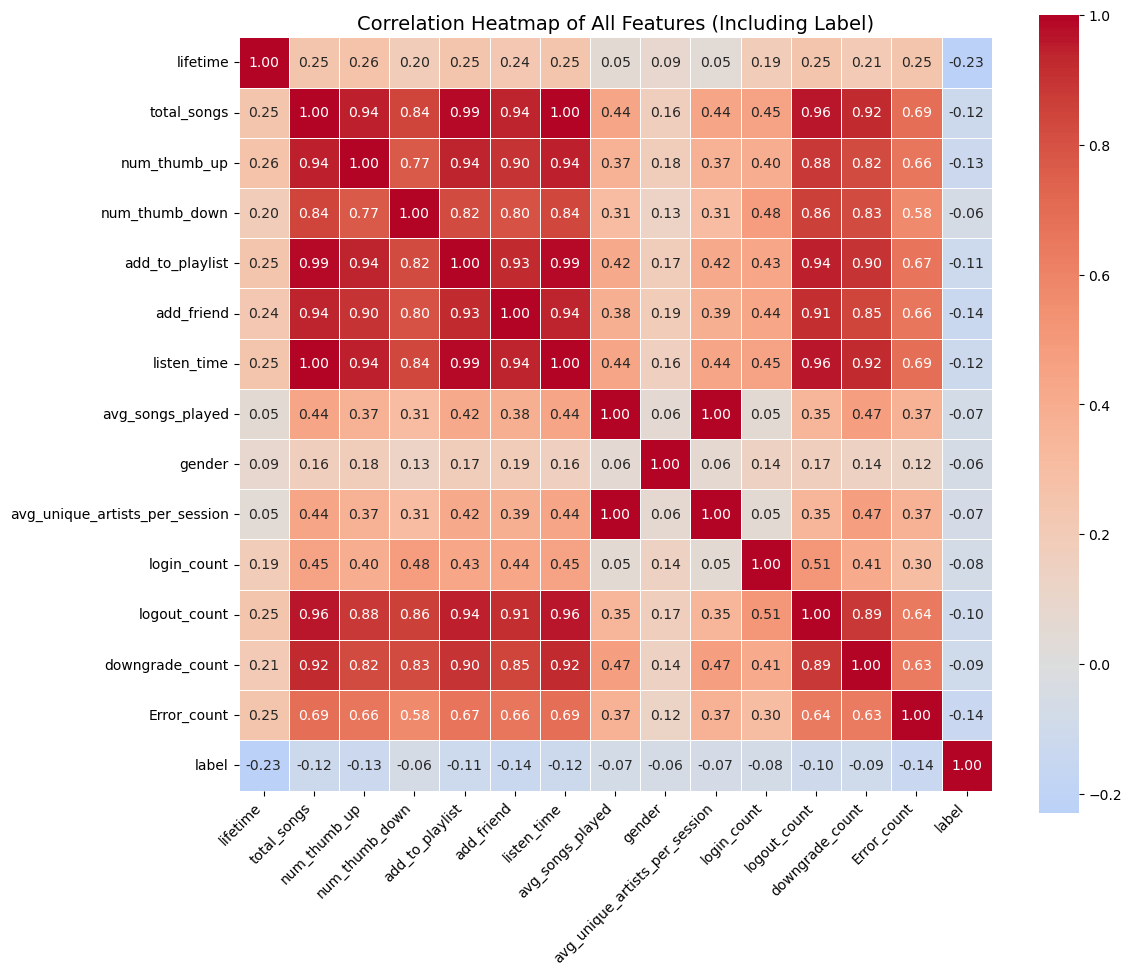

In [54]:
correlation_matrix = merged_data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)

plt.title('Correlation Heatmap of All Features (Including Label)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [55]:
merged_data

,lifetime,total_songs,num_thumb_up,num_thumb_down,add_to_playlist,add_friend,listen_time,avg_songs_played,gender,avg_unique_artists_per_session,login_count,logout_count,downgrade_count,Error_count,label
0,69.903171,755,29.0,6.0,13.0,20.0,188687.38342,107.857143,1,97.285714,0.0,11.0,13.0,0.0,0
1,80.895278,214,14.0,3.0,4.0,1.0,54424.74544,53.500000,0,52.000000,0.0,3.0,2.0,0.0,0
2,80.895278,214,14.0,3.0,4.0,1.0,54424.74544,53.500000,0,52.000000,0.0,3.0,2.0,0.0,1
3,62.797743,2048,95.0,26.0,59.0,46.0,506140.04138,93.090909,0,84.818182,0.0,24.0,21.0,4.0,0
4,48.391956,161,11.0,0.0,8.0,3.0,39525.04698,32.200000,0,31.800000,0.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,69.418380,3816,336.0,36.0,107.0,89.0,941922.73652,65.793103,1,61.879310,1.0,44.0,17.0,5.0,0
273,102.761921,364,25.0,5.0,9.0,11.0,91403.82518,33.090909,0,32.454545,0.0,5.0,1.0,0.0,0
274,150.455637,1797,169.0,16.0,63.0,31.0,447755.12315,66.555556,1,63.703704,1.0,19.0,12.0,3.0,0
275,38.900833,88,6.0,0.0,2.0,2.0,22698.64417,88.000000,1,85.000000,0.0,1.0,0.0,0.0,0


In [56]:
merged_data.to_csv("./processed_large_dataset.csv", index=False)

### 5. Build Based Model

#### Decision Tree

In [57]:
class step_2_decision_tree_classifier():
    def __init__(self, data):
        self.data = data
        self.X = None
        self.Y = None
        self.best_model = None

    def train_model(self, param_grid):
        """
        Trains a Decision Tree model using GridSearchCV.

        :param param_grid: Dictionary of hyperparameters to optimize.
        :return: Best trained model
        """

        self.X = self.data.drop(['CustomerID', 'Churn'], axis=1)  # Features
        self.Y = self.data["Churn"]  # Target variable

        # Split into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(self.X, self.Y, test_size=0.25, random_state=42, stratify=self.Y)

        # Initialize Decision Tree model
        dt = DecisionTreeClassifier(random_state=42)

        # Perform GridSearchCV
        grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Store the best model
        self.best_model = grid_search.best_estimator_

        # Return the trained model
        return self.best_model
    

    def plot_model(self):
        """
        Plots the decision tree of the given model.

        :param model: Trained DecisionTreeClassifier model to visualize.
        """
        plt.figure(figsize=(15, 8))
        plot_tree(
            self.best_model, 
            feature_names=self.X.columns.tolist(),  
            class_names=["Churn", "Not Churn"], 
            filled=True, 
            rounded=True
        )
        plt.show()


    def test_decision_tree(self, Dataframe_, model):
        """
        Tests the trained decision tree model on a new dataset.

        :param file_name: Path to the dataset file.
        :param model: Trained DecisionTreeClassifier model.
        :return: accuracy, precision, recall, f1 performance metrics
        """
        # Load the dataset
        Data = Dataframe_

        X_test = Data.drop(['CustomerID', 'Churn'], axis=1)  # Features
        y_test = Data["Churn"]  # Target variable

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Return the performance metrics
        return accuracy, precision, recall, f1

In [59]:
custom_param_grid = {
    "max_depth": [16],
    "min_samples_leaf": [10],
    "min_samples_split": [40],
    "criterion": ["gini", "entropy"]
}

train_df =  pd.read_csv('C:/Users/ignat/Downloads/cleaned_customer_churn_dataset_training.csv')
test_df =  pd.read_csv('C:/Users/ignat/Downloads/cleaned_customer_churn_dataset_testing.csv')

print(train_df)
print("*" *100)
print(test_df)


        CustomerID   Age  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0    39.0             14.0            5.0   
1              3.0  65.0    49.0              1.0           10.0   
2              4.0  55.0    14.0              4.0            6.0   
3              5.0  58.0    38.0             21.0            7.0   
4              6.0  23.0    32.0             20.0            5.0   
...            ...   ...     ...              ...            ...   
440828    449995.0  42.0    54.0             15.0            1.0   
440829    449996.0  25.0     8.0             13.0            1.0   
440830    449997.0  26.0    35.0             27.0            1.0   
440831    449998.0  28.0    55.0             14.0            2.0   
440832    449999.0  31.0    48.0             20.0            1.0   

        Payment Delay  Subscription Type  Contract Length  Total Spend  \
0                  10                  2                1       932.00   
1                  29              

In [60]:
decision_tree_classifier = step_2_decision_tree_classifier(train_df)
best_model = decision_tree_classifier.train_model(param_grid=custom_param_grid)
print(best_model)

DecisionTreeClassifier(criterion='entropy', max_depth=16, min_samples_leaf=10,
                       min_samples_split=40, random_state=42)


In [61]:
accuracy, precision, recall, f1 = decision_tree_classifier.test_decision_tree(test_df, best_model)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5186
Precision: 0.4960
Recall: 0.9983
F1 Score: 0.6627


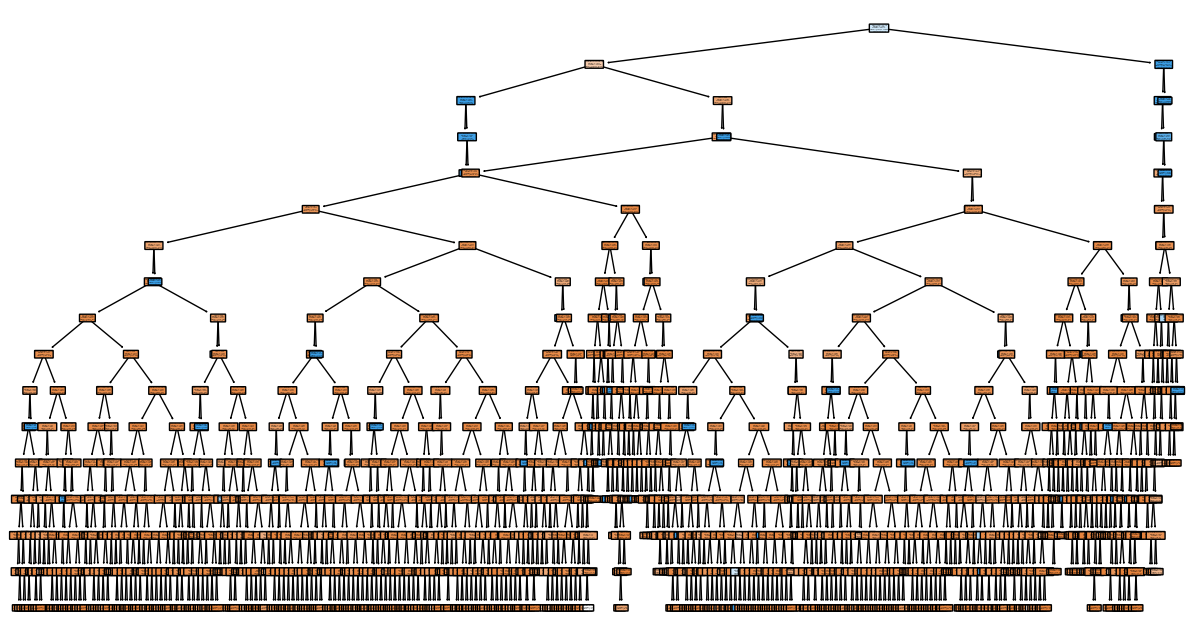

In [62]:
decision_tree_classifier.plot_model()

#### Logistic Regression

In [63]:
train_df =  pd.read_csv('C:/Users/ignat/Downloads/cleaned_customer_churn_dataset_training.csv')
test_df =  pd.read_csv('C:/Users/ignat/Downloads/cleaned_customer_churn_dataset_testing.csv')

print(train_df)
print("*" *100)
print(test_df)

        CustomerID   Age  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0    39.0             14.0            5.0   
1              3.0  65.0    49.0              1.0           10.0   
2              4.0  55.0    14.0              4.0            6.0   
3              5.0  58.0    38.0             21.0            7.0   
4              6.0  23.0    32.0             20.0            5.0   
...            ...   ...     ...              ...            ...   
440828    449995.0  42.0    54.0             15.0            1.0   
440829    449996.0  25.0     8.0             13.0            1.0   
440830    449997.0  26.0    35.0             27.0            1.0   
440831    449998.0  28.0    55.0             14.0            2.0   
440832    449999.0  31.0    48.0             20.0            1.0   

        Payment Delay  Subscription Type  Contract Length  Total Spend  \
0                  10                  2                1       932.00   
1                  29              

In [64]:
X_train = train_df.drop(['CustomerID', 'Churn'], axis=1)
y_train = train_df['Churn']

X_test = test_df.drop(['CustomerID', 'Churn'], axis=1)
y_test = test_df['Churn']

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

logistic_y_pred = logistic_regression.predict(X_test)

print("Accuracy:", accuracy_score(y_test, logistic_y_pred))
print("Precision:", precision_score(y_test, logistic_y_pred))
print("Recall:", recall_score(y_test, logistic_y_pred))
print("F1 Score:", f1_score(y_test, logistic_y_pred))

Accuracy: 0.5794109423058998
Precision: 0.5309960824143934
Recall: 0.9601219952120159
F1 Score: 0.6838103913393826


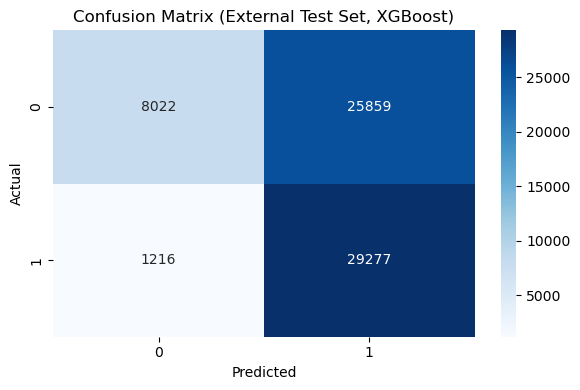

In [67]:
logistic_confusion_matrix = confusion_matrix(y_test, logistic_y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(logistic_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (External Test Set, XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()